# Demonstration of Analyses for "Comparison of Structural and Metabolic Biomarkers of Neurodegeneration for Brain Age Prediction"

**Steps of Analysis:**\
1 - bias-correction\
2 - brain age prediction in cognitively normals (CN)\
2.1 - validation of brain age prediction in CN\
3 - brain age prediction in individuals with mild cognitive impairment (MCI)\
6 - generate cross-validated predictions for whole dataset\
4 - association with cognitive performance/neuropathology

Examplary demonstration for PET modality

In [2]:
from brain_age_main import main
modality = 'PET'

/opt/anaconda/anaconda3/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


### Bias-correction
Comparison of no bia-correction ('None'), correction with chronological age (CA, 'True'), and correction without CA ('False').

In [ ]:
main(1, modality)

## Brain age prediction in CN

First column: 17Networks_LH_VisCent_ExStr_1 (should be 'X17Networks_LH_VisCent_ExStr_1')
Last column: CAU-lh (should be 'CAU-lh)
12 individuals younger than 65 years discarded.
Total participants:  438 Inside IQR of all regions:  411 
(27 participants discarded as outliers)
Outliers in train set:  13 Outliers in test set:  14
Total participants:  438 Inside IQR of all regions:  410 
(28 participants discarded as outliers)
Outliers in train set:  17 Outliers in test set:  11
Total participants:  438 Inside IQR of all regions:  415 
(23 participants discarded as outliers)
Outliers in train set:  15 Outliers in test set:  8
Total participants:  438 Inside IQR of all regions:  411 
(27 participants discarded as outliers)
Outliers in train set:  18 Outliers in test set:  9
Total participants:  438 Inside IQR of all regions:  411 
(27 participants discarded as outliers)
Outliers in train set:  15 Outliers in test set:  12


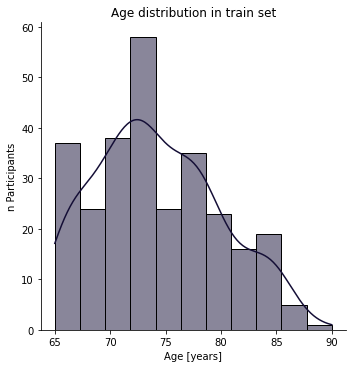

Significant association between  rvr -predicted age delta and CA: True
Significant association between  svm -predicted age delta and CA: True
---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.1154747986187528, R2: 0.7723977346453905


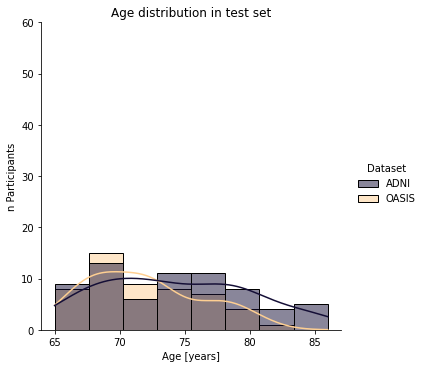

Kernel not linear, no weight coefficients available.
Bias between chronological age and BPAD eliminated: True (r = 0.20347165701571412 p = 0.09864256916594231 )


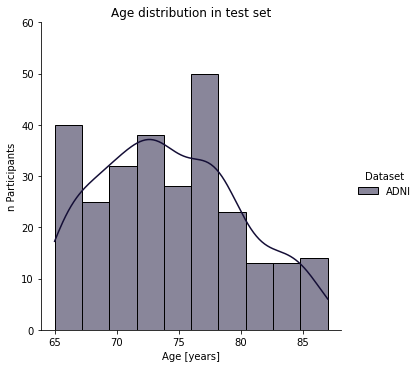

Significant association between  rvr -predicted age delta and CA: True
Significant association between  svm -predicted age delta and CA: True
---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.950835941551795, R2: 0.7988852079406835


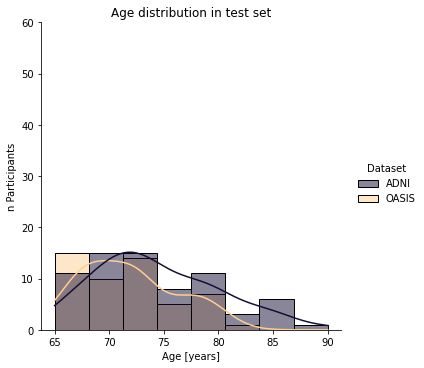

Bias between chronological age and BPAD eliminated: True (r = 0.0741816966708694 p = 0.541653024900591 )


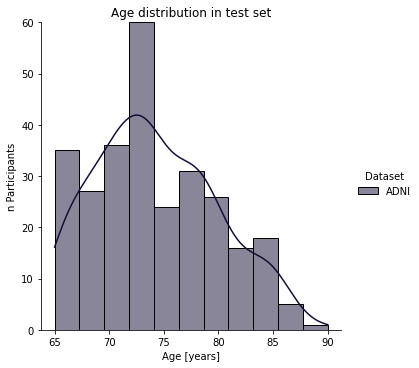

Significant association between  rvr -predicted age delta and CA: True
Significant association between  svm -predicted age delta and CA: True
---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.0885954815219434, R2: 0.7515160421988134


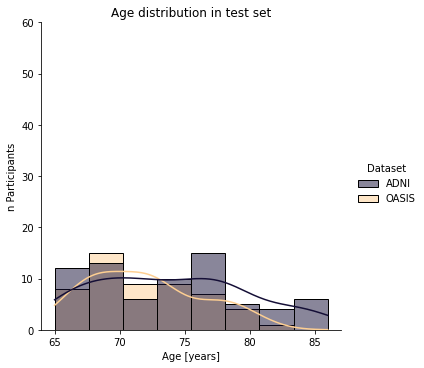

Kernel not linear, no weight coefficients available.
Bias between chronological age and BPAD eliminated: True (r = -0.04014553769990282 p = 0.7395857080251862 )


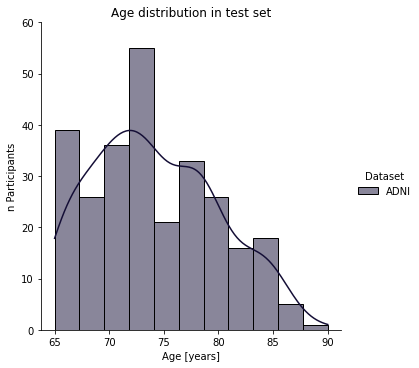

Significant association between  rvr -predicted age delta and CA: True
Significant association between  svm -predicted age delta and CA: True
---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 2.312232919108152, R2: 0.7268627721042396


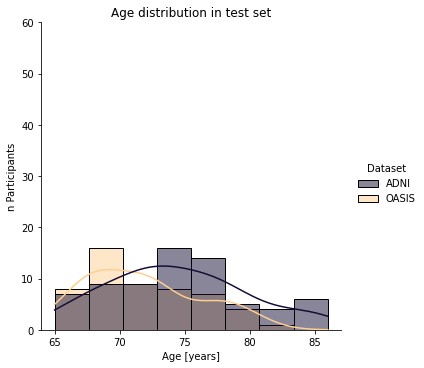

Kernel not linear, no weight coefficients available.
Bias between chronological age and BPAD eliminated: True (r = 0.12672060569834728 p = 0.2958603518317972 )


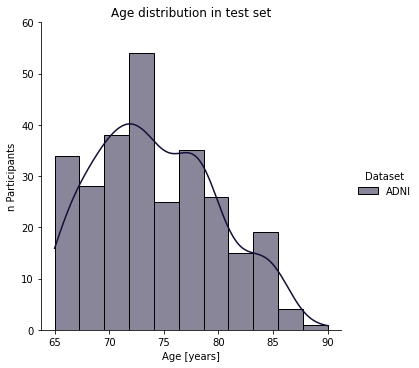

Significant association between  rvr -predicted age delta and CA: True
Significant association between  svm -predicted age delta and CA: True
---CROSS-VALIDATION---
 Final model (smallest MAE): svm
MAE: 1.6975265593018907, R2: 0.8514080313289731


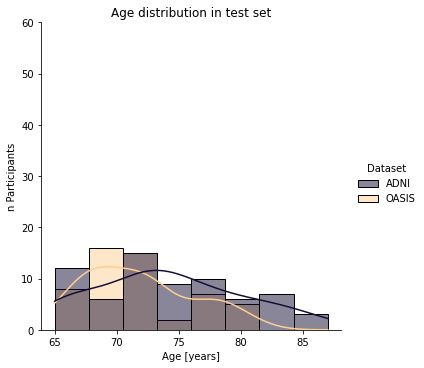

Bias between chronological age and BPAD eliminated: True (r = -0.04348743533294264 p = 0.7247447239824276 )
---TEST---
   Round       MAE        R2  Mean diff Model
0      0  2.872733  0.655593  -0.447569   svm
1      1  1.952497  0.828469  -0.040385   svm
2      2  2.677569  0.698579  -0.382617   svm
3      3  3.112348  0.486518   0.954997   svm
4      4  1.797482  0.860430  -0.129368   svm
          Round       MAE        R2  Mean diff
count  5.000000  5.000000  5.000000   5.000000
mean   2.000000  2.482526  0.705918  -0.008989
std    1.581139  0.578186  0.149679   0.564955
min    0.000000  1.797482  0.486518  -0.447569
25%    1.000000  1.952497  0.655593  -0.382617
50%    2.000000  2.677569  0.698579  -0.129368
75%    3.000000  2.872733  0.828469  -0.040385
max    4.000000  3.112348  0.860430   0.954997


In [3]:
main(2, modality)

## Brain age prediction in CN validation (OASIS)

---OASIS--
17Networks_LH_VisCent_ExStr_1 CAU-lh


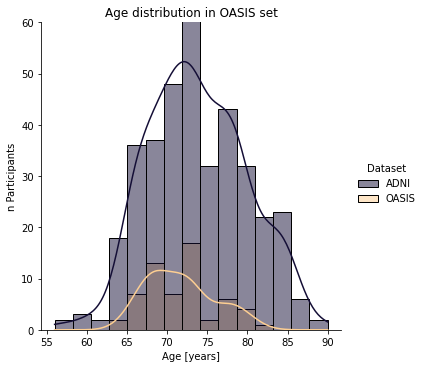

Bias between chronological age and BPAD eliminated: True (r = 0.16959796360281257 p = 0.19908604598384977 )
Bias between chronological age and BPAD eliminated: True (r = 0.15381854548890259 p = 0.244764202854116 )
Bias between chronological age and BPAD eliminated: False (r = 0.3227710712787224 p = 0.012654988362590503 )
Bias between chronological age and BPAD eliminated: True (r = 0.04083806895438488 p = 0.7587674872906921 )
Bias between chronological age and BPAD eliminated: True (r = 0.10435811858322724 p = 0.4315217740183048 )
        MAE        R2  mean_diff
0  1.849390  0.634320  -1.004463
1  2.513054  0.447864   0.004631
2  2.331131  0.487237  -0.404198
3  1.635891  0.716695  -0.781912
4  1.737025  0.664957  -0.912488
            MAE        R2  mean_diff
count  5.000000  5.000000   5.000000
mean   2.013299  0.590215  -0.619686
std    0.386136  0.116616   0.417226
min    1.635891  0.447864  -1.004463
25%    1.737025  0.487237  -0.912488
50%    1.849390  0.634320  -0.781912
75%   

In [4]:
main(3, modality)

## Brain age prediction in MCI

---MCI--
17Networks_LH_VisCent_ExStr_1 CAU-lh


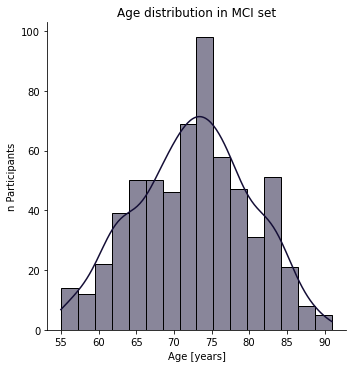

Bias between chronological age and BPAD eliminated: True (r = 0.05171269634601475 p = 0.19811570048736962 )
Bias between chronological age and BPAD eliminated: False (r = 0.25263525837260936 p = 1.6934622686990852e-10 )
Bias between chronological age and BPAD eliminated: False (r = 0.2599208533968923 p = 4.783465203803686e-11 )
Bias between chronological age and BPAD eliminated: False (r = -0.14229347571822695 p = 0.00037524912785805517 )
Bias between chronological age and BPAD eliminated: True (r = -0.025015972955683356 p = 0.533786546884853 )
        MAE        R2  mean_diff
0  1.919405  0.898443   0.819984
1  2.762859  0.780649   1.239185
2  2.628645  0.810019   0.759234
3  1.719942  0.917356   0.461589
4  1.881427  0.901562   0.589345
            MAE        R2  mean_diff
count  5.000000  5.000000   5.000000
mean   2.182455  0.861606   0.773867
std    0.476887  0.061800   0.295985
min    1.719942  0.780649   0.461589
25%    1.881427  0.810019   0.589345
50%    1.919405  0.898443   0

In [5]:
main(4, modality)

## Association with cognitive performance in CN
First predict age for all CN (excluding outliers) in cross-validated manner, then correlate with test scores and pathology.

In [6]:
main(5.1, modality)

---SIGNIFICANT CORRELATIONS BETWEEN BPAD & NEUROPSYCH---

---RESIDUAL CATEGORY GROUP EFFECTS---


## Association with neuropathology in CN

In [7]:
main(5.2, modality)

---SIGNIFICANT CORRELATIONS BETWEEN BPAD & NEUROPATH---

---RESIDUAL CATEGORY GROUP EFFECTS---


## Association with cognitive performance in MCI

---SIGNIFICANT CORRELATIONS BETWEEN BPAD & NEUROPSYCH---
Significant correlation between BPAD and ADNI_MEM:  True 
Significant correlation between BPAD and ADNI_MEM after controlling for the effect of sex and age: True


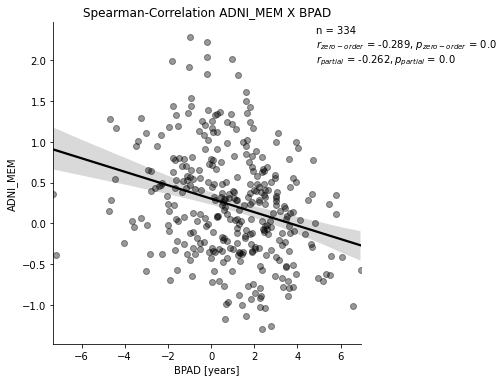

Significant correlation between BPAD and ADNI_EF:  True 
Significant correlation between BPAD and ADNI_EF after controlling for the effect of sex and age: True


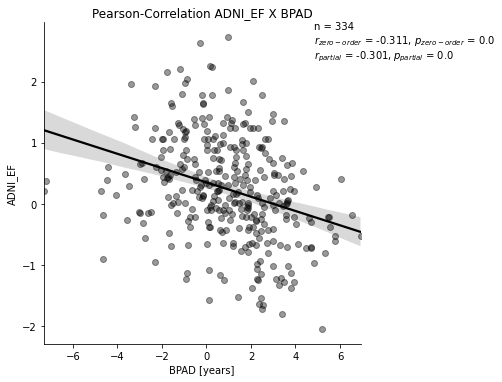


---RESIDUAL CATEGORY GROUP EFFECTS---
ADNI_MEM significant in positive BPAD:  True 
            n         r           CI95%     p-val
pearson  162 -0.237479  [-0.38, -0.09]  0.002497 
significant in neutral BPAD:  False 
            n         r          CI95%     p-val
pearson  113 -0.162052  [-0.34, 0.03]  0.089272 
significant in negative BPAD:  False 
           n         r          CI95%     p-val
pearson  59  0.210658  [-0.05, 0.45]  0.115741


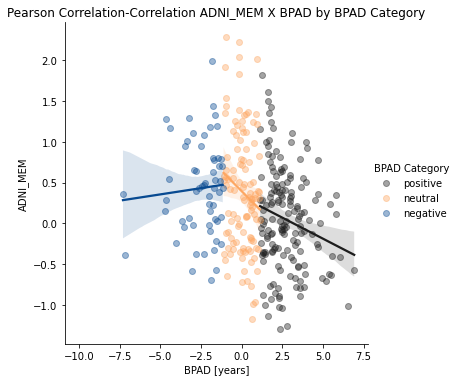

ADNI_EF significant in positive BPAD:  True 
            n         r           CI95%     p-val
pearson  162 -0.300592  [-0.44, -0.15]  0.000112 
significant in neutral BPAD:  False 
            n       r          CI95%     p-val
pearson  113 -0.0626  [-0.25, 0.13]  0.513946 
significant in negative BPAD:  False 
           n         r          CI95%     p-val
pearson  59  0.255089  [-0.01, 0.48]  0.055489


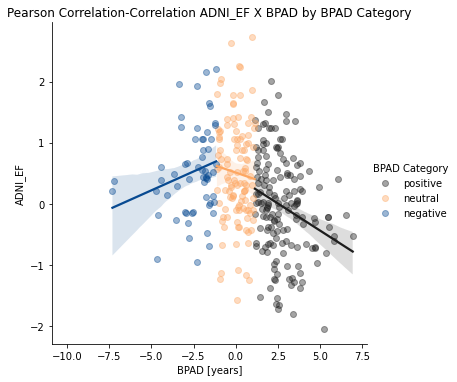

In [8]:
main(5.3, modality)

## Association with neuropathology in MCI

---SIGNIFICANT CORRELATIONS BETWEEN BPAD & NEUROPATH---
Significant correlation between BPAD and ABETA:  True 
Significant correlation between BPAD and ABETA after controlling for the effect of sex and age: True


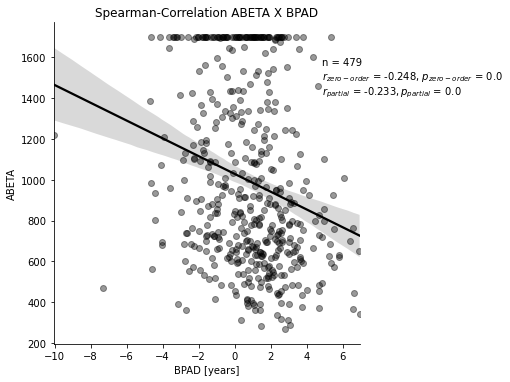

Significant correlation between BPAD and AV45:  True 
Significant correlation between BPAD and AV45 after controlling for the effect of sex and age: True


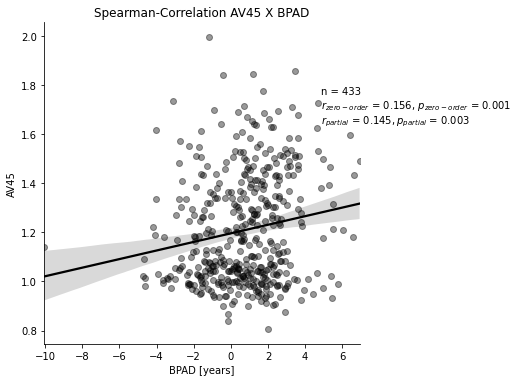


---RESIDUAL CATEGORY GROUP EFFECTS---
ABETA significant in positive BPAD:  True 
             n         r           CI95%    p-val
spearman  224 -0.210147  [-0.33, -0.08]  0.00164 
significant in neutral BPAD:  False 
             n        r          CI95%     p-val
spearman  159 -0.16024  [-0.31, -0.0]  0.044992 
significant in negative BPAD:  False 
            n         r          CI95%     p-val
spearman  96  0.020815  [-0.18, 0.22]  0.842164


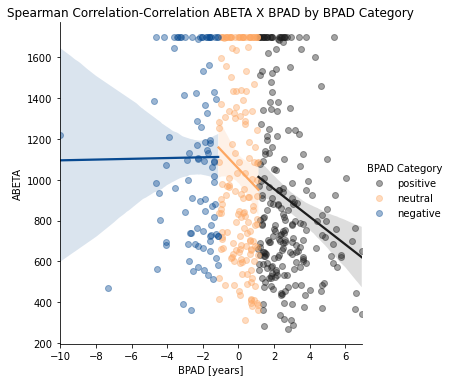

In [9]:
main(5.4, modality)